# 7-2 순방향 신경망 실습

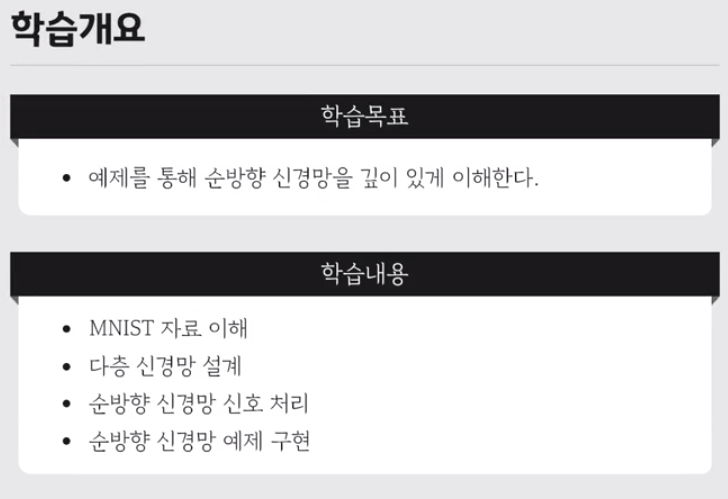


## 1. 인공 신경망
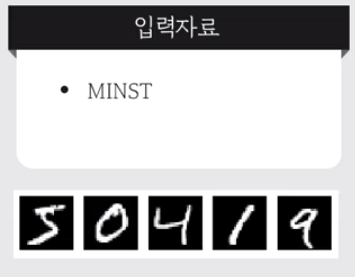

이 숫자들을 인식하는 인공 신경망을 만들어 보자

이전 강의에서 배웠던 행렬의 곱셉과 덧셈만으로만 계산할 수 있다.

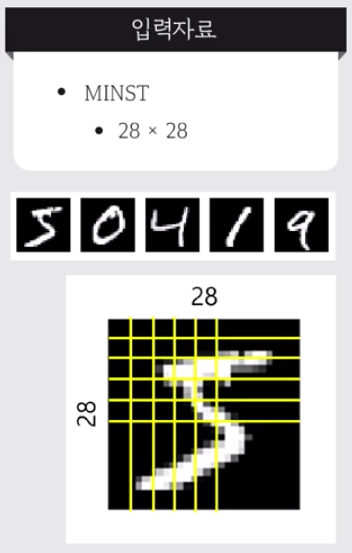

우리가 인식해야할 숫자 이미지는 28x28크기를 갖고 있기 때문에  
28*28인 784개의 입력이 필요하다.  



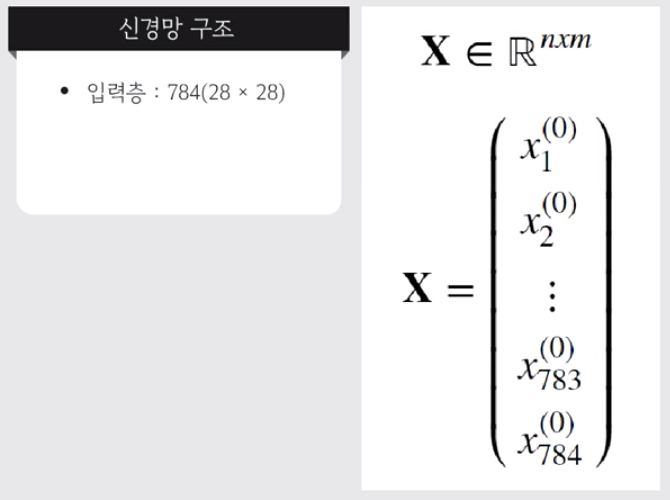


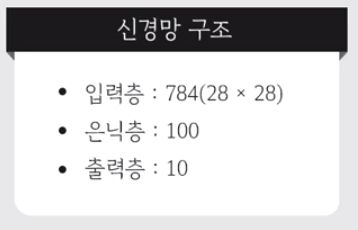

은닉층을 구성하는 뉴런은 몇개가 있으면 좋을까?  
정답은 없다.  
다만, 입력 뉴런이 많아지면 은닉층의 뉴런도 같이 늘려줘야 학습이 제대로 될 수 있기 때문에  
이번 실습에서는 100개로 잡고 코딩을 해본다.  

그리고 마지막 출력층은 몇개로 할까?

우리가 인식하려고 하는 숫자는 0부터 9까지 총 10가지의 숫자이다.  
따라서 출력층의 뉴런은 10개면 충분하다.

## 2. 인공 신경망 구조 : 전체 그림

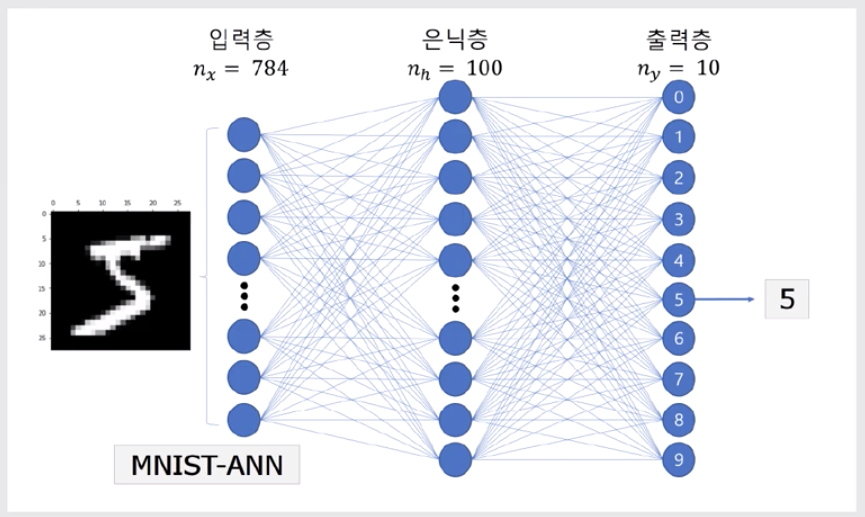

우리가 설계한 이 인공 신경망의 가중치는 몇 개나 될까?

입력 뉴런이 784개이고, 은닉층의 뉴런이 100개이다.

각각의 입력 뉴런과 은닉층 뉴런은 다 연결되어있기 때문에  
784 * 100개의 가중치가 필요하다.  
(= 78400 개)

그리고 은닉층과 출력층 사이인  
100 * 10개가 더 필요하다  
(= 1000 개)





## 3. 인공 신경망 구현

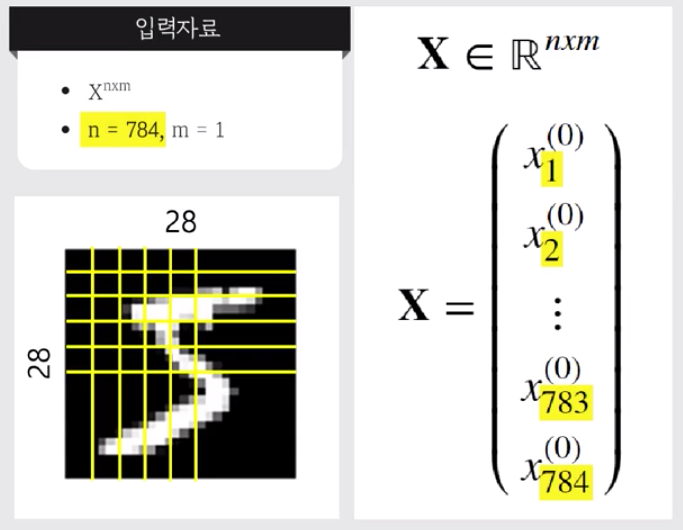

신경망의 입력 X는 784개의 특성을 가진 하나의 샘플이다.


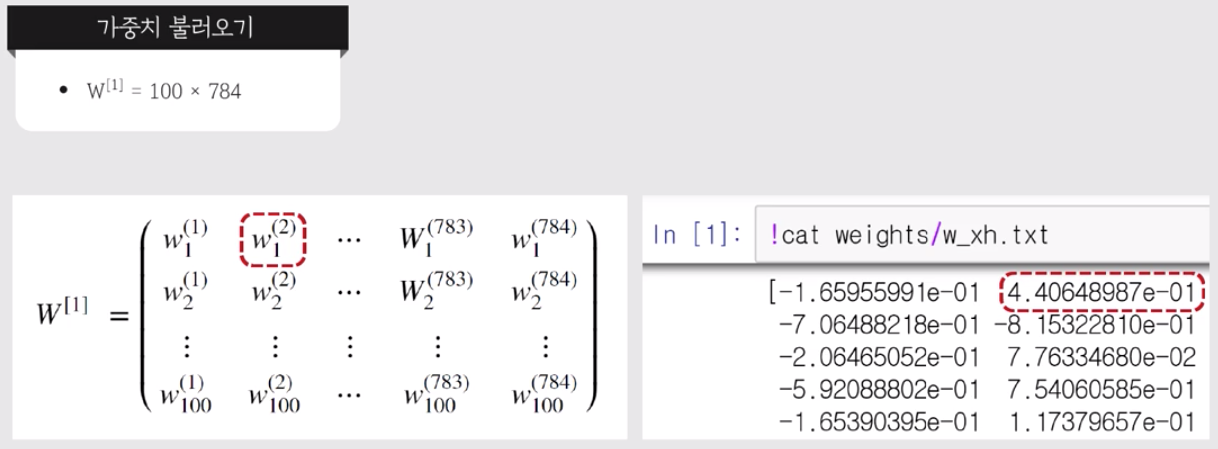

## 3. 인공 신경망 구현 : 은닉층 순입력 계산

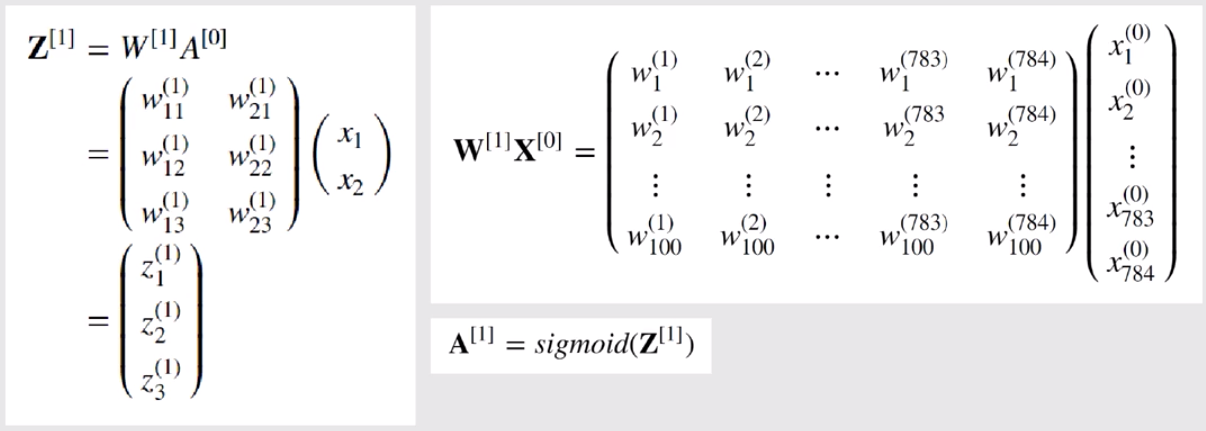



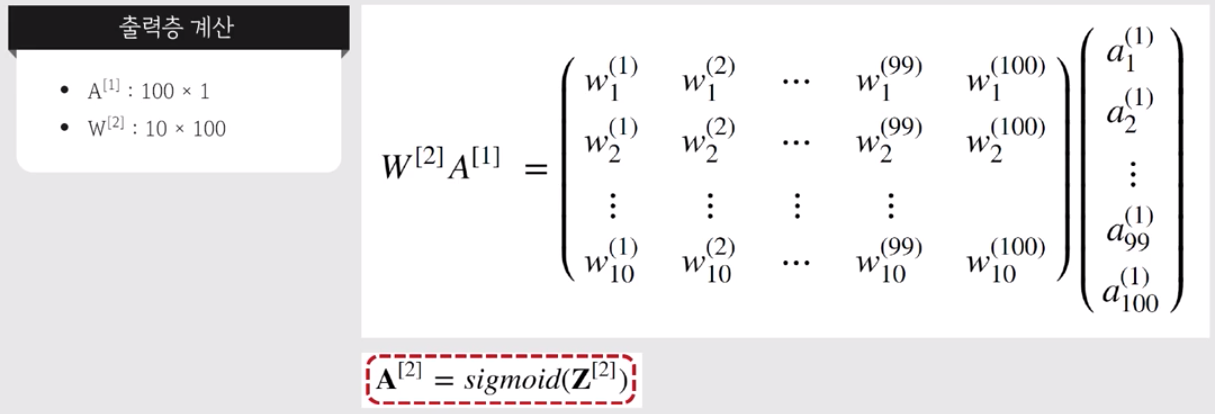

최종 출력 A2가 신경망이 예측한 y_hat이 된다.

## 4. 인공 신경망 구현 코드

아래 셀에 있는 순방향 신경망 코드를 실행하기 위해서는 현재 이 파일(JoyML07-2Code.ipynb)의 위치에서 다음과 같은 파일들이 필요합니다. 

1. joy.py
2. data/w_xh.weights <br>
   data/w_hy.weights
   
   `[다음 파일은 셀을 실행할 때, 자동으로 한번에 한하여 다운을 받습니다]`
3. data/t10k-images-idx3-ubyte.gz <br>
   data/t10k-labels-idx1-ubyte.gz <br>
   data/train-images-idx3-ubyte.gz <br>
   data/train-labels-idx1-ubyte.gz <br>

3번 항목의 4개의 파일을 다운을 받을 때 약간의 지체 현상을 볼 수 있습니다. 그 다음부터는 data폴더에 있는 자료를 부르거나 새롭게 생성한 mnist.pkl을 사용하기 때문에 속도가 상당히 빠릅니다. 혹은 교수자의 GitHub에서 직접 다운을 받아 data폴더에 저장하실 수 있습니다. 
   
> https://github.com/idebtor/KMOOC-ML

예를 들면, GitHub에 연결하여, `joy.py` 파일이름 위에서 오른쪽 마우스 버튼을 클릭하여, "다른 이름으로 링크 저장"을 선택하여 알맞는 폴더에 저장하면 됩니다. 혹은 `[Clone or download]`으로 전체를 다운받아서 사용해도 좋습니다. 

In [29]:
import joy
import numpy as np

g = lambda x : 1 / (1 + np.exp(-x)) # 람다를 사용하여, 시그모이드 함수를 구현한다.

(X,y) = joy.load_mnist_num(9) # X는 숫자가 적힌 이미지이고, y는 그 이미지의 레이블이다.

W1 = joy.load_mnist_weight('data/w_xh.weights') # 미리 학습된 가중치를 읽어온다. 입력층과 은닉층 사이의 가중치이다. (100x784)
Z1 = np.dot(W1, X) # Wij T표기법을 사용하니 바로 곱하여 순입력 Z1을 구한다
A1 = g(Z1) # 순입력 Z1을 활성화 함수를 통해 출력값 A1을 구한다

W2 = joy.load_mnist_weight('data/w_hy.weights') # 학습된 가중치를 읽어온다. 은닉층과 출력층 사이의 가중치이다. (100x10)
Z2 = np.dot(W2, A1) # 순입력 Z2를 구한다. 
yhat = g(Z2) # 출력값 A2을 구한다. y_hat과 동일하다. 신경망의 최종 결과이기 때문에 10개의 결과가 나올 것이다.

print('image(class label):', y) # y는 해당 이미지의 클래스 레이블이고
print('predict:', np.round_(yhat, 3)) # y_hat은 신경망이 예측한 결과 값이다
# print yhat one by one
for i, iyhat in enumerate(yhat): 
    print('[{}] = {}'.format(i, np.round(yhat[i], 3)))
    
print('image(predicted) = ', np.argmax(yhat))

image(class label): 9
predict: [0.005 0.002 0.002 0.006 0.006 0.006 0.    0.004 0.008 0.995]
[0] = 0.005
[1] = 0.002
[2] = 0.002
[3] = 0.006
[4] = 0.006
[5] = 0.006
[6] = 0.0
[7] = 0.004
[8] = 0.008
[9] = 0.995
image(predicted) =  9


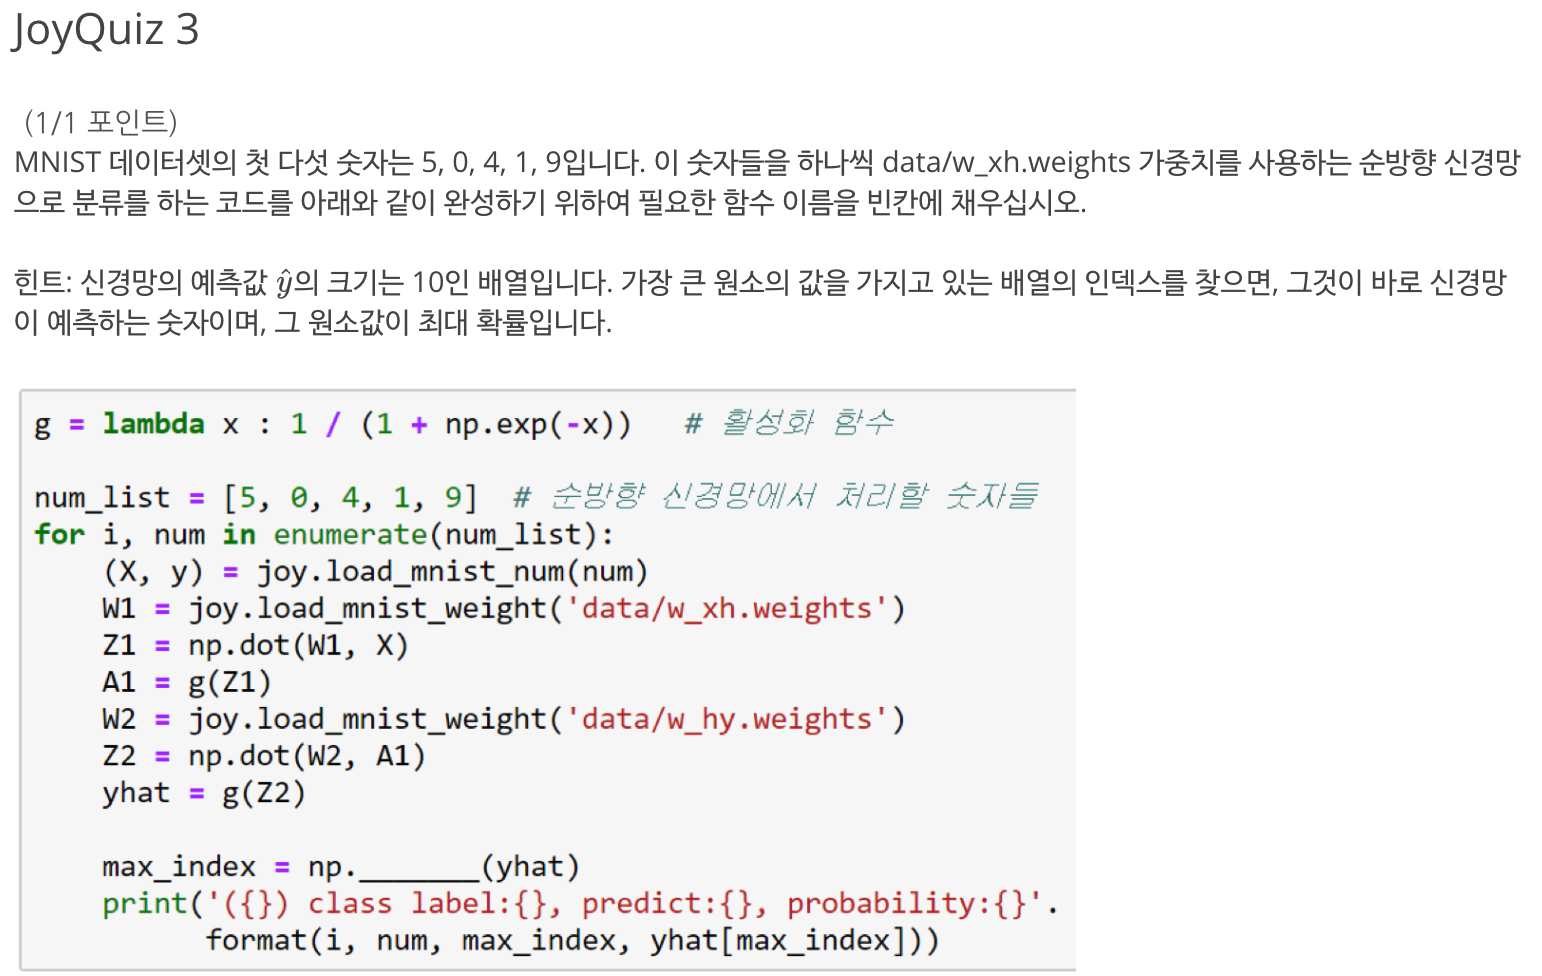

In [2]:
import joy
import numpy as np

g = lambda x : 1 / (1 + np.exp(-x)) # 람다를 사용하여, 시그모이드 함수를 구현한다.


num_list = [5, 0, 4, 1, 9]

for i, num in enumerate(num_list):
    (X, y) = joy.load_mnist_num(num)
    W1 = joy.load_mnist_weight('data/w_xh.weights') # 미리 학습된 가중치를 읽어온다. 입력층과 은닉층 사이의 가중치이다. (100x784)
    Z1 = np.dot(W1, X) # Wij T표기법을 사용하니 바로 곱하여 순입력 Z1을 구한다
    A1 = g(Z1) # 순입력 Z1을 활성화 함수를 통해 출력값 A1을 구한다

    W2 = joy.load_mnist_weight('data/w_hy.weights') # 학습된 가중치를 읽어온다. 은닉층과 출력층 사이의 가중치이다. (100x10)
    Z2 = np.dot(W2, A1) # 순입력 Z2를 구한다. 
    yhat = g(Z2) # 출력값 A2을 구한다. y_hat과 동일하다. 신경망의 최종 결과이기 때문에 10개의 결과가 나올 것이다.
    
    max_index = np.argmax(yhat)
    print('({}) class label: {}, predict: {}, probability: {}'.format(i, num, max_index, yhat[max_index]))

--- [-19.4409724    7.35870138 -46.37247104 -17.98627918 -15.53500415
  -9.56787044 -21.13429088  11.17782599  -6.27290477  -8.6519969
   1.70325764 -18.70944201   6.73767132 -16.33480282 -31.81965423
 -12.29295495 -22.13366461 -10.52253415  10.20903734 -19.57939937
 -21.18547742 -23.57915835  -4.10200799  -2.27797261   9.85687655
 -28.00452107   0.99103509 -25.51109245 -30.40077646 -23.28201975
 -13.10263004 -23.25133343 -20.39254234 -18.97732972 -19.62475271
  -7.38223919 -17.96603869 -33.84364653  -8.84429256  -9.92059657
 -16.13443625 -18.6386435   14.03717625 -11.85902063 -17.19141914
 -20.66626277 -14.70216718  -7.35688814 -10.7323093   16.4328598
 -17.73051655 -20.59822837  -7.97773129  -0.28585705 -23.05145326
  -4.91587026 -29.08813488 -18.42294825 -16.00850108  -2.17525723
 -15.29231264 -14.40671731  -9.62473195 -18.42054573  -8.66993507
 -24.40829684 -17.09188803 -24.20377957  -4.6853425  -16.15215737
 -14.61413642 -19.0959013   25.63719843 -16.38827948 -25.38314672
  -4.345